## Handling missing values in time-series data

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
plt.rcParams["font.family"] = "Arial"

c:\Users\Ian\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [16]:
nov_data = pd.read_csv(r"C:\Users\Ian\Desktop\Files ni Ian\New Files\10th Sem\App_Physics_157\Project\Weather data\202311.csv")
nov_data

,visibility,datetime,coord.lon,coord.lat,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.humidity,...,sys.sunset,weather.id,weather.main,weather.description,weather.icon,extraction_date_time,city_name,sys.type,sys.id,rain.1h
0,10000.0,2023-11-06 15:35:43+08:00,119.9811,16.1561,30.52,36.34,30.52,30.52,1009.0,70.0,...,2023-11-06 17:28:29+08:00,804.0,Clouds,overcast clouds,04d,2023-11-06 15:45:05.122654+08:00,Alaminos,NaN,NaN,NaN
1,10000.0,2023-11-06 15:45:07+08:00,120.5833,15.1500,35.25,42.25,35.25,35.25,1010.0,55.0,...,2023-11-06 17:27:17+08:00,802.0,Clouds,scattered clouds,03d,2023-11-06 15:45:07.511028+08:00,Angeles City,1.0,8152.0,NaN
2,10000.0,2023-11-06 15:45:09+08:00,121.1900,15.6181,29.74,34.87,29.74,29.74,1010.0,72.0,...,2023-11-06 17:24:18+08:00,801.0,Clouds,few clouds,02d,2023-11-06 15:45:09.096131+08:00,Antipolo,NaN,NaN,NaN
3,10000.0,2023-11-06 15:45:11+08:00,123.5085,12.2285,29.01,34.34,29.01,29.01,1009.0,78.0,...,2023-11-06 17:19:03+08:00,803.0,Clouds,broken clouds,04d,2023-11-06 15:45:11.662533+08:00,Bacolod,NaN,NaN,NaN
4,10000.0,2023-11-06 15:45:12+08:00,120.9290,14.4590,32.05,39.05,30.58,33.99,1009.0,72.0,...,2023-11-06 17:26:44+08:00,801.0,Clouds,few clouds,02d,2023-11-06 15:45:12.970057+08:00,Bacoor,2.0,2005706.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14466,10000.0,2023-11-24 00:04:56+08:00,124.5725,11.1089,25.08,26.05,25.08,25.08,1009.0,92.0,...,2023-11-24 17:15:13+08:00,800.0,Clear,clear sky,01n,2023-11-24 00:04:56.733308+08:00,Valencia,NaN,NaN,NaN
14467,10000.0,2023-11-24 00:04:59+08:00,120.9667,14.7000,27.11,30.72,26.13,27.28,1011.0,87.0,...,2023-11-24 17:24:04+08:00,804.0,Clouds,overcast clouds,04n,2023-11-24 00:04:59.184542+08:00,Valenzuela,2.0,2008256.0,NaN
14468,10000.0,2023-11-24 00:05:00+08:00,123.0778,10.9000,26.65,26.65,26.65,26.65,1009.0,89.0,...,2023-11-24 17:21:31+08:00,801.0,Clouds,few clouds,02n,2023-11-24 00:05:00.763382+08:00,Victorias,NaN,NaN,NaN
14469,10000.0,2023-11-24 00:05:03+08:00,120.3869,17.5747,25.50,26.30,25.50,25.50,1011.0,84.0,...,2023-11-24 17:21:46+08:00,802.0,Clouds,scattered clouds,03n,2023-11-24 00:05:03.247071+08:00,Vigan,NaN,NaN,NaN


We have `NaN`s in our data. Let's try to interpolate it to find the missing value. We can take the average of the neighbors and have it as the replacement!

Let's check our data in Alaminos. 

In [7]:
nov_data[nov_data.city_name=='Alaminos']

,visibility,datetime,coord.lon,coord.lat,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.humidity,main.sea_level,main.grnd_level,wind.speed,wind.deg,wind.gust,clouds.all,city_name,rain.1h
0,10000.0,2023-11-06 15:35:43+08:00,119.9811,16.1561,30.52,36.34,30.52,30.52,1009.0,70.0,1009.0,1007.0,1.82,66.0,2.63,93.0,Alaminos,NaN
138,10000.0,2023-11-06 18:00:01+08:00,119.9811,16.1561,27.88,31.80,27.88,27.88,1010.0,80.0,1010.0,1008.0,2.44,32.0,3.05,93.0,Alaminos,NaN
276,10000.0,2023-11-07 00:00:00+08:00,119.9811,16.1561,26.87,29.54,26.87,26.87,1012.0,81.0,1012.0,1010.0,3.34,113.0,4.45,93.0,Alaminos,0.65
414,10000.0,2023-11-07 06:00:01+08:00,119.9811,16.1561,26.38,26.38,26.38,26.38,1012.0,82.0,1012.0,1009.0,5.36,100.0,7.70,33.0,Alaminos,NaN
551,10000.0,2023-11-07 12:00:00+08:00,119.9811,16.1561,30.55,34.14,30.55,30.55,1011.0,61.0,1011.0,1009.0,4.28,113.0,4.38,10.0,Alaminos,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13645,10000.0,2023-11-23 09:00:00+08:00,119.9811,16.1561,27.50,29.52,27.50,27.50,1012.0,68.0,1012.0,1010.0,3.06,95.0,3.85,24.0,Alaminos,NaN
13782,10000.0,2023-11-23 12:00:00+08:00,119.9811,16.1561,29.23,31.43,29.23,29.23,1011.0,60.0,1011.0,1009.0,3.89,48.0,4.05,16.0,Alaminos,NaN
13920,10000.0,2023-11-23 15:00:00+08:00,119.9811,16.1561,28.82,32.16,28.82,28.82,1009.0,69.0,1009.0,1007.0,4.99,5.0,4.91,13.0,Alaminos,NaN
14195,10000.0,2023-11-23 21:00:15+08:00,119.9811,16.1561,26.70,29.24,26.70,26.70,1011.0,82.0,1011.0,1009.0,2.68,359.0,3.71,28.0,Alaminos,NaN


Let's plot the temperature in Alaminos for the entirety of November. 

In [93]:
pd.to_datetime(nov_data[nov_data.city_name=='Alaminos']['datetime']).dt.tz_localize(None)

0       2023-11-06 15:35:43
138     2023-11-06 18:00:01
276     2023-11-07 00:00:00
414     2023-11-07 06:00:01
551     2023-11-07 12:00:00
                ...        
13645   2023-11-23 09:00:00
13782   2023-11-23 12:00:00
13920   2023-11-23 15:00:00
14195   2023-11-23 21:00:15
14333   2023-11-24 00:00:00
Name: datetime, Length: 104, dtype: datetime64[ns]

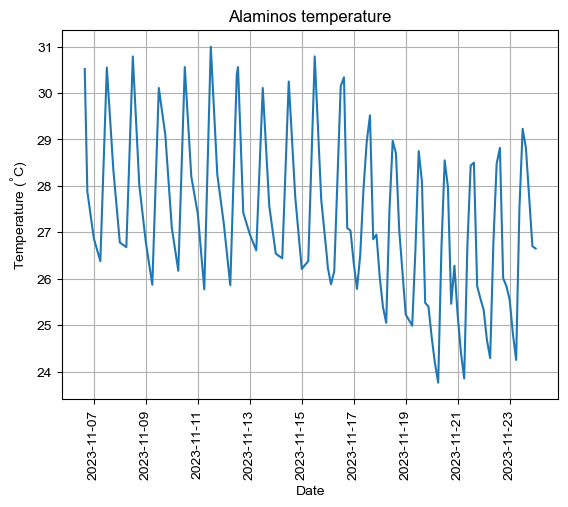

In [97]:
dates = pd.to_datetime(nov_data[nov_data.city_name=='Alaminos']['datetime']).dt.tz_localize(None)
temps = nov_data[nov_data.city_name=='Alaminos']['main.temp']
plt.plot(dates, temps)
plt.title('Alaminos temperature')
plt.xlabel('Date')
plt.ylabel(r'Temperature ($^\degree$C)')
plt.xticks(rotation='vertical')
plt.grid(True)

Let's drop all the columns with categorical variables as we cannot interpolate over them. We can do that using 

<center>

```pd.DataFrame.drop(columns=['col1', 'col2', ... , 'colN'])```

</center>

In [3]:
nov_data = nov_data.drop(columns=['sys.sunrise', 'sys.sunset', 'weather.id', 'weather.main', 'weather.icon', 'weather.description', \
                                  'extraction_date_time', 'sys.type', 'sys.id'])

Here we use the function ```pd.isna(df)``` if there are ```NaN```s in Alaminos. This returns a boolean array which we're summing over, to get the total amount of ```NaN```s.

In [5]:
pd.isna(nov_data[nov_data.city_name=='Alaminos']).sum()

visibility           0
datetime             0
coord.lon            0
coord.lat            0
main.temp            0
main.feels_like      0
main.temp_min        0
main.temp_max        0
main.pressure        0
main.humidity        0
main.sea_level       0
main.grnd_level      0
wind.speed           0
wind.deg             0
wind.gust            0
clouds.all           0
city_name            0
rain.1h            103
dtype: int64

And we see that there are no ```NaN```s in the other columns except for the column ```rain.1h```. However, we don't want to interpolate the data fro ```rain.1h``` as rain is not gradual unlike temperature, humidity, and other variables. What we want to do is drop it first, interpolate over the other data, and reinsert it later. 

We can interpolate data using the function

<center>

```pd.Series.interpolate()```

</center>

However, since interpolate only works over series, we need to use the transform function to interpolate over all of the data.

In [8]:
nov_data[nov_data.city_name=='Alaminos'].transform(pd.DataFrame.interpolate)

,visibility,datetime,coord.lon,coord.lat,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.humidity,main.sea_level,main.grnd_level,wind.speed,wind.deg,wind.gust,clouds.all,city_name,rain.1h
0,10000.0,2023-11-06 15:35:43+08:00,119.9811,16.1561,30.52,36.34,30.52,30.52,1009.0,70.0,1009.0,1007.0,1.82,66.0,2.63,93.0,Alaminos,NaN
138,10000.0,2023-11-06 18:00:01+08:00,119.9811,16.1561,27.88,31.80,27.88,27.88,1010.0,80.0,1010.0,1008.0,2.44,32.0,3.05,93.0,Alaminos,NaN
276,10000.0,2023-11-07 00:00:00+08:00,119.9811,16.1561,26.87,29.54,26.87,26.87,1012.0,81.0,1012.0,1010.0,3.34,113.0,4.45,93.0,Alaminos,0.65
414,10000.0,2023-11-07 06:00:01+08:00,119.9811,16.1561,26.38,26.38,26.38,26.38,1012.0,82.0,1012.0,1009.0,5.36,100.0,7.70,33.0,Alaminos,0.65
551,10000.0,2023-11-07 12:00:00+08:00,119.9811,16.1561,30.55,34.14,30.55,30.55,1011.0,61.0,1011.0,1009.0,4.28,113.0,4.38,10.0,Alaminos,0.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13645,10000.0,2023-11-23 09:00:00+08:00,119.9811,16.1561,27.50,29.52,27.50,27.50,1012.0,68.0,1012.0,1010.0,3.06,95.0,3.85,24.0,Alaminos,0.65
13782,10000.0,2023-11-23 12:00:00+08:00,119.9811,16.1561,29.23,31.43,29.23,29.23,1011.0,60.0,1011.0,1009.0,3.89,48.0,4.05,16.0,Alaminos,0.65
13920,10000.0,2023-11-23 15:00:00+08:00,119.9811,16.1561,28.82,32.16,28.82,28.82,1009.0,69.0,1009.0,1007.0,4.99,5.0,4.91,13.0,Alaminos,0.65
14195,10000.0,2023-11-23 21:00:15+08:00,119.9811,16.1561,26.70,29.24,26.70,26.70,1011.0,82.0,1011.0,1009.0,2.68,359.0,3.71,28.0,Alaminos,0.65


Let's make a new dataframe named ```nov_norain``` where we can interpolate the data without the dates, coordinates, city name, and rainfall received. 

In [98]:
nov_norain = nov_data[nov_data.columns.difference(['datetime', 'coord.lon', 'coord.lat', 'city_name', 'rain.1h'])].transform(\
    pd.DataFrame.interpolate)
# nov_norain.insert(0, 'rain.1h', nov_data['rain.1h'], True)
# nov_norain['city_name'], nov_norain['rain.1h'] = [nov_data['city_name'], nov_data['rain.1h']]
nov_norain['rain.1h'] = nov_data['rain.1h']
nov_norain.insert(0, 'city_name', nov_data['city_name']) # reinserting the city names
nov_norain.insert(1, 'datetime', nov_data['datetime']) # reinserting datetime
nov_norain['datetime'] = nov_norain['datetime'].replace('+08:00', ' ') # doesn't work for some reason
nov_norain.fillna(0, inplace=True) 
nov_norain

,city_name,datetime,clouds.all,extraction_date_time,main.feels_like,main.grnd_level,main.humidity,main.pressure,main.sea_level,main.temp,...,sys.type,visibility,weather.description,weather.icon,weather.id,weather.main,wind.deg,wind.gust,wind.speed,rain.1h
0,Alaminos,2023-11-06 15:35:43+08:00,93.0,2023-11-06 15:45:05.122654+08:00,36.34,1007.0,70.0,1009.0,1009.0,30.52,...,0.000000,10000.0,overcast clouds,04d,804.0,Clouds,66.0,2.63,1.82,0.00
1,Angeles City,2023-11-06 15:45:07+08:00,40.0,2023-11-06 15:45:07.511028+08:00,42.25,1004.0,55.0,1010.0,1009.5,35.25,...,1.000000,10000.0,scattered clouds,03d,802.0,Clouds,90.0,4.05,3.09,0.00
2,Antipolo,2023-11-06 15:45:09+08:00,14.0,2023-11-06 15:45:09.096131+08:00,34.87,1001.0,72.0,1010.0,1010.0,29.74,...,1.333333,10000.0,few clouds,02d,801.0,Clouds,89.0,5.47,2.89,0.00
3,Bacolod,2023-11-06 15:45:11+08:00,66.0,2023-11-06 15:45:11.662533+08:00,34.34,1008.0,78.0,1009.0,1009.0,29.01,...,1.666667,10000.0,broken clouds,04d,803.0,Clouds,66.0,7.71,5.41,0.00
4,Bacoor,2023-11-06 15:45:12+08:00,20.0,2023-11-06 15:45:12.970057+08:00,39.05,1008.0,72.0,1009.0,1008.5,32.05,...,2.000000,10000.0,few clouds,02d,801.0,Clouds,100.0,7.35,2.57,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14466,Valencia,2023-11-24 00:04:56+08:00,6.0,2023-11-24 00:04:56.733308+08:00,26.05,1005.0,92.0,1009.0,1009.0,25.08,...,1.750000,10000.0,clear sky,01n,800.0,Clear,65.0,2.55,1.65,0.00
14467,Valenzuela,2023-11-24 00:04:59+08:00,99.0,2023-11-24 00:04:59.184542+08:00,30.72,1006.0,87.0,1011.0,1009.0,27.11,...,2.000000,10000.0,overcast clouds,04n,804.0,Clouds,36.0,3.52,2.21,0.00
14468,Victorias,2023-11-24 00:05:00+08:00,18.0,2023-11-24 00:05:00.763382+08:00,26.65,1007.0,89.0,1009.0,1009.0,26.65,...,1.666667,10000.0,few clouds,02n,801.0,Clouds,27.0,4.74,3.08,0.00
14469,Vigan,2023-11-24 00:05:03+08:00,45.0,2023-11-24 00:05:03.247071+08:00,26.30,1009.0,84.0,1011.0,1011.0,25.50,...,1.333333,10000.0,scattered clouds,03n,802.0,Clouds,43.0,3.13,2.98,0.00


What we want to do now is use the total seconds that have passed from the recording of the data since the start of that year. For example, if the data is recorded at 11/06/2023, the time has passed since 01/01/2023 is 11 months is 6 days. Then, we need to convert that into seconds which will serve as a "name" to distinguish data from the same city taken at different times. 

In [99]:
nov_norain['datetime'] = pd.to_datetime(nov_norain['datetime']) # making the column into a datetime type
nov_norain['datetime'] = nov_norain['datetime'].dt.tz_localize(None) # localizing the datetime, removing the time zone
# nov_norain['datetime'] = pd.to_timedelta(nov_norain['datetime'])
nov_norain

,city_name,datetime,clouds.all,extraction_date_time,main.feels_like,main.grnd_level,main.humidity,main.pressure,main.sea_level,main.temp,...,sys.type,visibility,weather.description,weather.icon,weather.id,weather.main,wind.deg,wind.gust,wind.speed,rain.1h
0,Alaminos,2023-11-06 15:35:43,93.0,2023-11-06 15:45:05.122654+08:00,36.34,1007.0,70.0,1009.0,1009.0,30.52,...,0.000000,10000.0,overcast clouds,04d,804.0,Clouds,66.0,2.63,1.82,0.00
1,Angeles City,2023-11-06 15:45:07,40.0,2023-11-06 15:45:07.511028+08:00,42.25,1004.0,55.0,1010.0,1009.5,35.25,...,1.000000,10000.0,scattered clouds,03d,802.0,Clouds,90.0,4.05,3.09,0.00
2,Antipolo,2023-11-06 15:45:09,14.0,2023-11-06 15:45:09.096131+08:00,34.87,1001.0,72.0,1010.0,1010.0,29.74,...,1.333333,10000.0,few clouds,02d,801.0,Clouds,89.0,5.47,2.89,0.00
3,Bacolod,2023-11-06 15:45:11,66.0,2023-11-06 15:45:11.662533+08:00,34.34,1008.0,78.0,1009.0,1009.0,29.01,...,1.666667,10000.0,broken clouds,04d,803.0,Clouds,66.0,7.71,5.41,0.00
4,Bacoor,2023-11-06 15:45:12,20.0,2023-11-06 15:45:12.970057+08:00,39.05,1008.0,72.0,1009.0,1008.5,32.05,...,2.000000,10000.0,few clouds,02d,801.0,Clouds,100.0,7.35,2.57,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14466,Valencia,2023-11-24 00:04:56,6.0,2023-11-24 00:04:56.733308+08:00,26.05,1005.0,92.0,1009.0,1009.0,25.08,...,1.750000,10000.0,clear sky,01n,800.0,Clear,65.0,2.55,1.65,0.00
14467,Valenzuela,2023-11-24 00:04:59,99.0,2023-11-24 00:04:59.184542+08:00,30.72,1006.0,87.0,1011.0,1009.0,27.11,...,2.000000,10000.0,overcast clouds,04n,804.0,Clouds,36.0,3.52,2.21,0.00
14468,Victorias,2023-11-24 00:05:00,18.0,2023-11-24 00:05:00.763382+08:00,26.65,1007.0,89.0,1009.0,1009.0,26.65,...,1.666667,10000.0,few clouds,02n,801.0,Clouds,27.0,4.74,3.08,0.00
14469,Vigan,2023-11-24 00:05:03,45.0,2023-11-24 00:05:03.247071+08:00,26.30,1009.0,84.0,1011.0,1011.0,25.50,...,1.333333,10000.0,scattered clouds,03n,802.0,Clouds,43.0,3.13,2.98,0.00


Now, we need to convert this date into seconds. Converting into seconds is done using the 

<center>

pd.Timedelta.dt.total_seconds()

</center>

Notice that timedelta? It needs a difference of two dates to compute for the seconds elapsed from the new year of that year to the time of the recording. Timedeltas can be done by:

In [11]:
nov_norain['datetime'] - pd.Timestamp('2023-01-01 00:00:00')

0       309 days 15:35:43
1       309 days 15:45:07
2       309 days 15:45:09
3       309 days 15:45:11
4       309 days 15:45:12
               ...       
14466   327 days 00:04:56
14467   327 days 00:04:59
14468   327 days 00:05:00
14469   327 days 00:05:03
14470   327 days 00:05:05
Name: datetime, Length: 14471, dtype: timedelta64[ns]

Now, we're ready to turn this time that has passed into seconds.

In [12]:
nov_norain['total_second'] = (nov_norain['datetime'] - pd.Timestamp('2023-01-01 00:00:00') ).dt.total_seconds()
nov_norain

,city_name,datetime,clouds.all,main.feels_like,main.grnd_level,main.humidity,main.pressure,main.sea_level,main.temp,main.temp_max,main.temp_min,visibility,wind.deg,wind.gust,wind.speed,rain.1h,total_second
0,Alaminos,2023-11-06 15:35:43,93.0,36.34,1007.0,70.0,1009.0,1009.0,30.52,30.52,30.52,10000.0,66.0,2.63,1.82,0.00,26753743.0
1,Angeles City,2023-11-06 15:45:07,40.0,42.25,1004.0,55.0,1010.0,1009.5,35.25,35.25,35.25,10000.0,90.0,4.05,3.09,0.00,26754307.0
2,Antipolo,2023-11-06 15:45:09,14.0,34.87,1001.0,72.0,1010.0,1010.0,29.74,29.74,29.74,10000.0,89.0,5.47,2.89,0.00,26754309.0
3,Bacolod,2023-11-06 15:45:11,66.0,34.34,1008.0,78.0,1009.0,1009.0,29.01,29.01,29.01,10000.0,66.0,7.71,5.41,0.00,26754311.0
4,Bacoor,2023-11-06 15:45:12,20.0,39.05,1008.0,72.0,1009.0,1008.5,32.05,33.99,30.58,10000.0,100.0,7.35,2.57,0.00,26754312.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14466,Valencia,2023-11-24 00:04:56,6.0,26.05,1005.0,92.0,1009.0,1009.0,25.08,25.08,25.08,10000.0,65.0,2.55,1.65,0.00,28253096.0
14467,Valenzuela,2023-11-24 00:04:59,99.0,30.72,1006.0,87.0,1011.0,1009.0,27.11,27.28,26.13,10000.0,36.0,3.52,2.21,0.00,28253099.0
14468,Victorias,2023-11-24 00:05:00,18.0,26.65,1007.0,89.0,1009.0,1009.0,26.65,26.65,26.65,10000.0,27.0,4.74,3.08,0.00,28253100.0
14469,Vigan,2023-11-24 00:05:03,45.0,26.30,1009.0,84.0,1011.0,1011.0,25.50,25.50,25.50,10000.0,43.0,3.13,2.98,0.00,28253103.0


## Automating the cleaning process

Let's load in the other data:

In [31]:
dec_data = pd.read_csv(r"C:\Users\Ian\Desktop\Files ni Ian\New Files\10th Sem\App_Physics_157\Project\Weather data\202312.csv")
jan_data = pd.read_csv(r"C:\Users\Ian\Desktop\Files ni Ian\New Files\10th Sem\App_Physics_157\Project\Weather data\202401.csv")
feb_data = pd.read_csv(r"C:\Users\Ian\Desktop\Files ni Ian\New Files\10th Sem\App_Physics_157\Project\Weather data\202402.csv")
mar_data = pd.read_csv(r"C:\Users\Ian\Desktop\Files ni Ian\New Files\10th Sem\App_Physics_157\Project\Weather data\202403.csv")
apr_data = pd.read_csv(r"C:\Users\Ian\Desktop\Files ni Ian\New Files\10th Sem\App_Physics_157\Project\Weather data\202404.csv")

Let's make a function that will automate this process. However, we need to distinguish whether data is from 2023 or 2024. Thus, we need to get the year of the datetime timestamp of any row in the data.

I can get that by having

<center>

```pandas.Datetime.year```

</center>

In [42]:
pd.to_datetime(dec_data.iloc[0, 1]).tz_localize(None).year

2023

- ```dec_data.iloc[0, 1]``` - gets the first date in the ```datetime``` column
- ```pd.to_datetime()``` - converts the column to a datetime object
- ```.tz_localize(None)``` - localizes the datetime, essentially removing the time zone
- ```.year``` - gets the year of the date

Thus, we need to check if the value above is 2023 or not. 

The function is as follows:

In [100]:
def clean(df):
    # Dropping other columns 
    df = df.drop(columns=['sys.sunrise', 'sys.sunset', 'weather.id', 'weather.main', 'weather.icon', 'weather.description', \
                                  'extraction_date_time', 'sys.type', 'sys.id'])
    
    # Interpolating data
    df_clean = df[df.columns.difference(['datetime', 'coord.lon', 'coord.lat', 'city_name', 'rain.1h'])].transform(\
    pd.DataFrame.interpolate)
    df_clean['rain.1h'] = df['rain.1h'] # leaving rain data alone and not interpolating
    df_clean.fillna(0, inplace=True) # zeroing out blank rain data

    df_clean.insert(0, 'city_name', df['city_name'])
    df_clean.insert(1, 'datetime', df['datetime'])
    
    # Removing the timezone in the date
    df_clean['datetime'] = pd.to_datetime(df_clean['datetime']).dt.tz_localize(None)

    # # Total seconds column
    if df_clean.iloc[0, 1].year == 2023: # need to distinguish whether it's from 2023 or 2024
        df_clean['total_second'] = (df_clean['datetime'] - pd.Timestamp('2023-01-01 00:00:00') ).dt.total_seconds()
    else: 
        df_clean['total_second'] = (df_clean['datetime'] - pd.Timestamp('2024-01-01 00:00:00') ).dt.total_seconds()
    
    return df_clean

In [101]:
months = [dec_data, jan_data, feb_data, mar_data, apr_data]
clean_data = []

for i in range(5):
    clean_data.append(clean(months[i]))

Checking the other data,

In [102]:
clean_data[4]

,city_name,datetime,clouds.all,main.feels_like,main.grnd_level,main.humidity,main.pressure,main.sea_level,main.temp,main.temp_max,main.temp_min,visibility,wind.deg,wind.gust,wind.speed,rain.1h,total_second
0,Alaminos,2024-04-01 00:06:00,97.0,26.43,1010.0,85.0,1013.0,1013.0,26.43,26.43,26.43,10000.0,298.0,0.470,0.28,0.00,7862760.0
1,Angeles City,2024-04-01 00:06:02,20.0,29.68,1007.5,74.0,1013.0,1013.5,27.25,27.25,23.37,10000.0,300.0,1.210,1.03,0.00,7862762.0
2,Antipolo,2024-04-01 00:06:04,87.0,24.11,1005.0,85.0,1014.0,1014.0,23.49,23.49,23.49,10000.0,87.0,1.950,1.97,0.00,7862764.0
3,Bacolod,2024-04-01 00:06:06,59.0,26.39,1012.0,84.0,1013.0,1013.0,26.39,26.39,26.39,10000.0,76.0,8.350,4.65,0.00,7862766.0
4,Bacoor,2024-04-01 00:06:08,20.0,32.44,1011.5,82.0,1012.0,1012.5,28.01,28.99,27.80,10000.0,120.0,6.845,2.06,0.00,7862768.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24912,Valencia,2024-04-23 12:10:04,68.0,38.83,994.0,40.0,1009.0,1009.0,35.84,35.84,35.84,10000.0,113.0,5.140,3.84,0.00,9807004.0
24913,Valenzuela,2024-04-23 12:10:07,41.0,41.65,996.0,69.0,1010.0,1009.0,34.65,35.99,32.20,10000.0,18.0,8.940,2.24,0.00,9807007.0
24914,Victorias,2024-04-23 12:10:09,76.0,38.39,998.0,63.0,1009.0,1009.0,32.15,32.15,32.15,10000.0,53.0,8.410,5.53,0.00,9807009.0
24915,Vigan,2024-04-23 12:10:10,51.0,42.52,998.0,71.0,1010.0,1009.0,35.52,35.52,35.52,10000.0,280.0,3.230,3.93,0.00,9807010.0


However, the data from different months are still in different dataframes. We can combine them vertically by executing

<center>

``` pd.concat([df1, df2, ... , dfN])```

</center>

In [89]:
weather_data = pd.concat([nov_norain, clean_data[0], clean_data[1], clean_data[2], clean_data[3], clean_data[4]])
weather_data

,city_name,datetime,clouds.all,main.feels_like,main.grnd_level,main.humidity,main.pressure,main.sea_level,main.temp,main.temp_max,main.temp_min,visibility,wind.deg,wind.gust,wind.speed,rain.1h,total_second
0,Alaminos,2023-11-06 15:35:43,93.0,36.34,1007.0,70.0,1009.0,1009.0,30.52,30.52,30.52,10000.0,66.0,2.63,1.82,0.00,26753743.0
1,Angeles City,2023-11-06 15:45:07,40.0,42.25,1004.0,55.0,1010.0,1009.5,35.25,35.25,35.25,10000.0,90.0,4.05,3.09,0.00,26754307.0
2,Antipolo,2023-11-06 15:45:09,14.0,34.87,1001.0,72.0,1010.0,1010.0,29.74,29.74,29.74,10000.0,89.0,5.47,2.89,0.00,26754309.0
3,Bacolod,2023-11-06 15:45:11,66.0,34.34,1008.0,78.0,1009.0,1009.0,29.01,29.01,29.01,10000.0,66.0,7.71,5.41,0.00,26754311.0
4,Bacoor,2023-11-06 15:45:12,20.0,39.05,1008.0,72.0,1009.0,1008.5,32.05,33.99,30.58,10000.0,100.0,7.35,2.57,0.00,26754312.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24912,Valencia,2024-04-23 12:10:04,68.0,38.83,994.0,40.0,1009.0,1009.0,35.84,35.84,35.84,10000.0,113.0,5.14,3.84,0.00,9807004.0
24913,Valenzuela,2024-04-23 12:10:07,41.0,41.65,996.0,69.0,1010.0,1009.0,34.65,35.99,32.20,10000.0,18.0,8.94,2.24,0.00,9807007.0
24914,Victorias,2024-04-23 12:10:09,76.0,38.39,998.0,63.0,1009.0,1009.0,32.15,32.15,32.15,10000.0,53.0,8.41,5.53,0.00,9807009.0
24915,Vigan,2024-04-23 12:10:10,51.0,42.52,998.0,71.0,1010.0,1009.0,35.52,35.52,35.52,10000.0,280.0,3.23,3.93,0.00,9807010.0
